In [ ]:
from Functions import *
import datetime
import matplotlib.pyplot as plt

# connect to the LCR meter
ser_lcr = DeviceConnect('/dev//cu.usbserial-A94IP9Y2')  # LCR Meter
ser_cn740 = DeviceConnect('/dev/cu.usbserial-BG00XWYD')  # Omega CN740 (RS-485)

freq = Frequencies(100, 10000, 3) # start, stop, number of points in-between (log spaced) 
# 10 Hz - 100 kHz (2 - 5 in log space) 

# mainReadings = ["R", "C", "L", "Z"]   (Ohm, H, C, Ohm) 
# minorReadings = ["X", "D", "Q", "THR" (θ), "ESR"] (Ohm, None, None, deg, Ohm) 
mainReadings = ['R'] # can add multiple readings
minorReadings = ['THR'] # can add multiple readings
voltage = 1 # AC voltage (V)
biasVoltage = 0 # DC bias voltage. set to None if no bias is needed. 
numMeasurements = 3 
#chamber H = 37 mm, D = 8.4 mm
area = np.pi/4*8.4**2 # mm^2     
area = round(area, 2)
thickness = 37  # mm
material = 'paraffin wax'

try:    
    # material = input('Material? ')
    params = [material, mainReadings, minorReadings]
    info = f'{area}, Area (mm^2), {thickness}, Thickness (mm), {voltage}, V, n={numMeasurements}'
    dataFrame = Experiment(ser_lcr, freq, mainReadings, minorReadings, voltage, biasVoltage, numMeasurements)

    DataExport(params, dataFrame, info)

except Exception as e:
    print(f'Test Aborted: {e}')
    if 'dataFrame' in locals():
        info = f'{area}, mm^2, {thickness}, mm, {voltage}, V, n={numMeasurements}'
        DataExport(params, dataFrame, info)
        print("!!! Partial data saved.")

finally:
    DeviceDisconnect(ser_lcr)

# LCRCommander(ser_lcr, 'SYST:REM') # remote mode
# LCRCommander(ser_lcr, 'SYST:LOC') # local mode

   Frequency         R Avg.    R Std.  R-THR Avg.  R-THR Std.
0        100  100947.333333  0.942809    0.000000    0.000000
1       1000  100948.666667  0.942809   -0.027977    0.000000
2      10000  100944.333333  9.463380   -0.257110    0.162022
Test completed




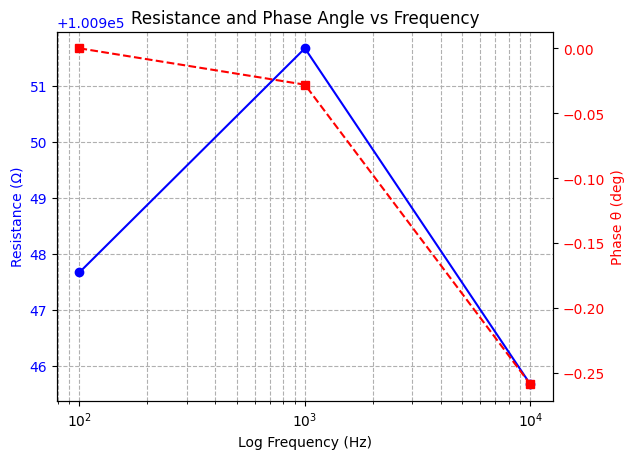

In [2]:
fig, ax1 = plt.subplots()

# Left Y-axis (Major param)
ax1.plot(dataFrame['Frequency'], dataFrame['R Avg.'], marker='o', linestyle='-', color='blue', label='Resistance (Ω)')
ax1.set_xlabel('Log Frequency (Hz)')
ax1.set_ylabel('Resistance (Ω)', color='blue')
ax1.set_xscale('log')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.ticklabel_format(style='plain', axis='y')

# Right y-axis (Minor param)
ax2 = ax1.twinx()
ax2.plot(dataFrame['Frequency'], dataFrame['R-THR Avg.'], marker='s', linestyle='--', color='red', label='Phase θ (deg)')
ax2.set_ylabel('Phase θ (deg)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

ax1.grid(True, which='both', ls='--')
plt.title('Resistance and Phase Angle vs Frequency')
plt.show()

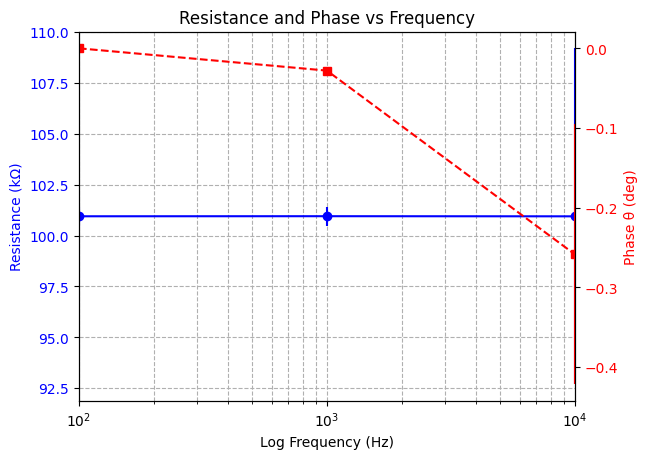

In [3]:
fig, ax1 = plt.subplots()

# Left Y-axis (Major param)
ax1.errorbar(
    dataFrame['Frequency'], dataFrame['R Avg.']/1000, yerr=dataFrame['R Std.'],
    fmt='o-', color='blue')
ax1.set_xlabel('Log Frequency (Hz)')
ax1.set_ylabel('Resistance (kΩ)', color='blue')
ax1.set_xscale('log')
ax1.set_xlim(freq[0], freq[-1])
ax1.tick_params(axis='y', labelcolor='blue')

# Right y-axis (Minor param)
ax2 = ax1.twinx()
ax2.errorbar(
    dataFrame['Frequency'], dataFrame['R-THR Avg.'], yerr=dataFrame['R-THR Std.'],
    fmt='s--', color='red')
ax2.set_ylabel('Phase θ (deg)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# 
ax1.grid(True, which='both', ls='--')
plt.title('Resistance and Phase vs Frequency')
plt.show()

In [46]:
print(mainReadings)
freq[0]

['R']


np.int64(100)